In [46]:
import numpy as np
import matplotlib.pyplot as plt
import utils as u
import keras as k
import datetime

In [47]:
imgSize = 64

In [48]:
autoencoder = u.createConv2Autoencoder(imgSize, imgSize, 1, [16, 8, 8])

autoencoder.compile(
    optimizer=k.optimizers.adadelta(),
    loss=k.losses.binary_crossentropy,
    metrics=[k.metrics.accuracy, k.metrics.categorical_crossentropy]
)

In [49]:
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
encoder_conv0 (Conv2D)       (None, 64, 64, 16)        160       
_________________________________________________________________
encoder_maxp0 (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
encoder_conv1 (Conv2D)       (None, 32, 32, 8)         1160      
_________________________________________________________________
encoder_maxp1 (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
encoder_conv2 (Conv2D)       (None, 16, 16, 8)         584       
_________________________________________________________________
encoder_maxp2 (MaxPooling2D) (None, 8, 8, 8)           0   

In [50]:
def generator(batchSize=20):
    while True:
        xs = np.zeros((batchSize, imgSize, imgSize, 1))
        ys = np.zeros((batchSize, imgSize, imgSize, 1))
        for i in range(batchSize):
            x, y = u.createTrainingPair(imgSize, 40, 10)
            xs[i, :, :, 0] = x
            ys[i, :, :, 0] = y
        yield xs, ys

In [51]:
bs = 100
nrSamples = 200
spe = nrSamples / bs
history = autoencoder.fit(x=generator(bs), steps_per_epoch=spe, epochs=50)

ValueError: `steps_per_epoch=None` is only valid for a generator based on the `keras.utils.Sequence` class. Please specify `steps_per_epoch` or use the `keras.utils.Sequence` class.

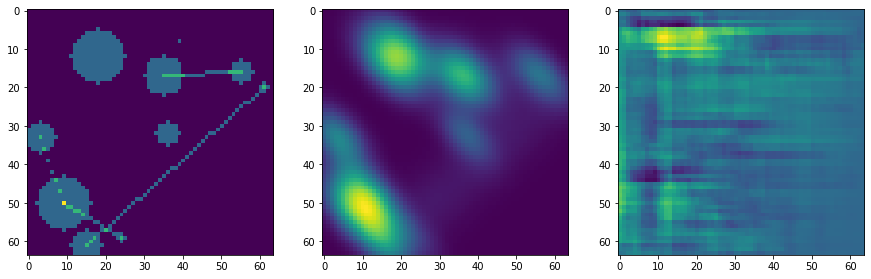

In [52]:
truth, obs = u.createTrainingPair(imgSize, 40, 10)
prediction = autoencoder.predict(obs.reshape(1, imgSize, imgSize, 1))
predictionR = prediction[0, :, :, 0]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(truth)
axes[1].imshow(obs)
axes[2].imshow(predictionR)

In [53]:
dt = datetime.datetime.now().strftime("%d.%m.%Y-%H.%M.%S")
autoencoder.save(f"./outputs/autoencoder_{dt}.h5")